# Customer Segmentation - Clustering

In [1]:
import pandas as pd
pd.set_option('display.max_columns',200)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("PBL5recommendationdata.csv", encoding = "latin-1")

In [3]:
df.shape

(4194, 181)

In [4]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,64.29,NaN,6993607863,510142,NaN,1,1426019099,1.438868e+09,1.426101e+09,NaN,Insured By Eye4Fraud,NaN,NaN,NaN,NaN,NaN,NaN,0.0,528

In [5]:
df['Orders.currency'].unique()

array(['USD'], dtype=object)

In [6]:
df.isnull().sum()

Customers.id                0
Customers.fname             0
Customers.lname             0
Customers.company        3467
Customers.create_date       0
                         ... 
Products.leg_style       4194
Products.seat_size       4032
Products.family_id        325
Products.saved_status     264
Products.freight_cost    4194
Length: 181, dtype: int64

In [7]:
df = df.drop_duplicates(subset="Customers.id")

In [8]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,64.29,NaN,6993607863,510142,NaN,1,1426019099,1.438868e+09,1.426101e+09,NaN,Insured By Eye4Fraud,NaN,NaN,NaN,NaN,NaN,NaN,0.0,528

In [9]:
df.shape

(3054, 181)

In [10]:
unique_columns = []
for column in df.columns:
    if df[column].unique().shape[0] == 1:
        unique_columns.append(column)

In [11]:
df = df.drop(columns=unique_columns)

In [12]:
df.shape

(3054, 146)

In [13]:
df.sample(5)

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.tax_exempt,Customers.account_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.payment_id,Orders.payment_code,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attribute_names,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.reorder_frequency,Order_Items.flags,Products.id,Products.status,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.short_description,Products.long_description,Products.video,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.seat_size,Products.family_id,Products.saved_status
2377,2000,JEANIE,TENNANT,NaN,1450801124,NaN,NaN,NaN,NaN,1456954200,NaN,10417,2000,JEANIE,TENNANT,NaN,10417,NaN,NaN,NaN,41.99,0.0,9.95,NaN,NaN,NaN,NaN,NaN,NaN,51.94,NaN,manual,0|Standard Shipping,NaN,6.48225E+11,3.0,1.450801e+09,abe,authorize.net,NaN,51.94,7825462047,05595D,1,1450801125,1.451519e+09,1.451317e+09,NaN,Phone Order,NaN,NaN,0.0,12573,10417,NaN,WCA808990,NaN,1,41.99,41.99,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2445,2057,Kent,garrett,NaN,1451336012,NaN,NaN,NaN,NaN,1456953458,NaN,10886,2057,Kent,garrett,NaN,10886,NaN,NaN,NaN,65.43,0.0,19.99,NaN,NaN,NaN,NaN,NaN,NaN,85.42,NaN,NaN,NaN,NaN,7.75302E+11,3.0,1.451336e+09,Berry,authorize.net,NaN,85.42,7839019175,458305,1,1451336013,1.451519e+09,1.451338e+09,NaN,Phone Order,NaN,NaN,0.0,13061,10886,17175.0,NeckPro Overdoor Cervical Traction Device - Ad...,

In [14]:
df['Customers.company'].isnull().sum()

2593

In [15]:
df['Customers.company'].isnull().sum()

2593

In [16]:
list(df.columns)

['Customers.id',
 'Customers.fname',
 'Customers.lname',
 'Customers.company',
 'Customers.create_date',
 'Customers.status',
 'Customers.mailing',
 'Customers.tax_exempt',
 'Customers.account_id',
 'Customers.last_modified',
 'Customers.customer_type',
 'Orders.id',
 'Orders.customer_id',
 'Orders.fname',
 'Orders.lname',
 'Orders.company',
 'Orders.order_number',
 'Orders.reorder_id',
 'Orders.external_source',
 'Orders.external_id',
 'Orders.subtotal',
 'Orders.tax',
 'Orders.shipping',
 'Orders.coupon_id',
 'Orders.coupon_amount',
 'Orders.fee_name',
 'Orders.fee_amount',
 'Orders.discount_name',
 'Orders.discount_amount',
 'Orders.total',
 'Orders.balance_due',
 'Orders.shipping_carrier',
 'Orders.shipping_method',
 'Orders.weight',
 'Orders.tracking',
 'Orders.payment_status',
 'Orders.payment_date',
 'Orders.payment_user',
 'Orders.payment_type',
 'Orders.payment_method',
 'Orders.payment_amount',
 'Orders.payment_id',
 'Orders.payment_code',
 'Orders.status',
 'Orders.placed_da

In [17]:
df['Orders.payment_status'].unique()

array([ 3.,  0.,  1., nan])

In [18]:
x=df[['Orders.id','Orders.customer_id','Orders.order_number','Orders.subtotal','Orders.payment_method','Orders.customer_type','Order_Items.product_id',
 'Order_Items.price']]

In [19]:
x.head()

,Orders.id,Orders.customer_id,Orders.order_number,Orders.subtotal,Orders.payment_method,Orders.customer_type,Order_Items.product_id,Order_Items.price
0,3758,797,3758,57.20,NaN,0.0,2310.0,57.20
1,23,3,23,20.00,NaN,0.0,177.0,5.00
3,29,4,29,19.56,Credit Card,0.0,983.0,19.56
4,30,5,30,36.05,Credit Card,0.0,991.0,36.05
7,32,7,32,39.19,Credit Card,0.0,1379.0,39.19


In [20]:
df['Orders.payment_method'].unique()

array([nan, 'Credit Card', 'PayPal', 'Check', 'Cash'], dtype=object)

In [21]:
d_orders={'nan':0,'Credit Card':1, 'PayPal':2, 'Check':3, 'Cash':4}

In [22]:
x['Orders.payment_method']=x['Orders.payment_method'].map(d_orders)

In [23]:
x.head()

,Orders.id,Orders.customer_id,Orders.order_number,Orders.subtotal,Orders.payment_method,Orders.customer_type,Order_Items.product_id,Order_Items.price
0,3758,797,3758,57.20,NaN,0.0,2310.0,57.20
1,23,3,23,20.00,NaN,0.0,177.0,5.00
3,29,4,29,19.56,1.0,0.0,983.0,19.56
4,30,5,30,36.05,1.0,0.0,991.0,36.05
7,32,7,32,39.19,1.0,0.0,1379.0,39.19


In [24]:
x['Orders.payment_method']=x['Orders.payment_method'].fillna(4)

In [25]:
x.head()

,Orders.id,Orders.customer_id,Orders.order_number,Orders.subtotal,Orders.payment_method,Orders.customer_type,Order_Items.product_id,Order_Items.price
0,3758,797,3758,57.20,4.0,0.0,2310.0,57.20
1,23,3,23,20.00,4.0,0.0,177.0,5.00
3,29,4,29,19.56,1.0,0.0,983.0,19.56
4,30,5,30,36.05,1.0,0.0,991.0,36.05
7,32,7,32,39.19,1.0,0.0,1379.0,39.19


In [26]:
x.isnull().sum()

Orders.id                   0
Orders.customer_id          0
Orders.order_number         0
Orders.subtotal             0
Orders.payment_method       0
Orders.customer_type      156
Order_Items.product_id     29
Order_Items.price           0
dtype: int64

In [27]:
import matplotlib.pyplot as plt

(array([2570.,    0.,    0.,    0.,    0.,  284.,    0.,    0.,    0.,
          44.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

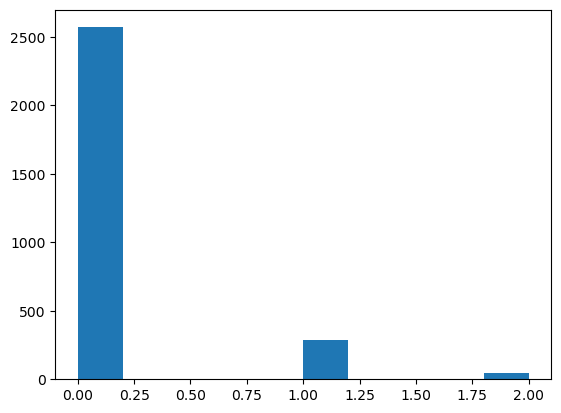

In [28]:
plt.hist(x['Orders.customer_type'])

In [29]:
x['Orders.customer_type'].mode()

0    0.0
Name: Orders.customer_type, dtype: float64

In [30]:
x['Orders.customer_type'].unique()

array([ 0.,  1., nan,  2.])

In [31]:
x['Orders.customer_type'].fillna('0',inplace=True)

In [32]:
x.isnull().sum()

Orders.id                  0
Orders.customer_id         0
Orders.order_number        0
Orders.subtotal            0
Orders.payment_method      0
Orders.customer_type       0
Order_Items.product_id    29
Order_Items.price          0
dtype: int64

(array([1901.,  450.,   29.,  100.,   86.,  163.,  222.,   40.,   19.,
          15.]),
 array([1.10000e+01, 2.62740e+03, 5.24380e+03, 7.86020e+03, 1.04766e+04,
        1.30930e+04, 1.57094e+04, 1.83258e+04, 2.09422e+04, 2.35586e+04,
        2.61750e+04]),
 <BarContainer object of 10 artists>)

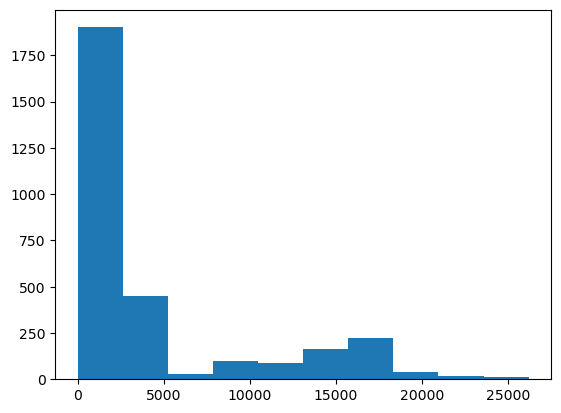

In [33]:
plt.hist(x['Order_Items.product_id'])

In [34]:
x['Order_Items.product_id'].unique()

array([2310.,  177.,  983., ..., 4524., 2707.,  562.])

In [35]:
x['Order_Items.product_id'].describe()

count     3025.000000
mean      4559.562975
std       5683.257868
min         11.000000
25%        970.000000
50%       1867.000000
75%       4395.000000
max      26175.000000
Name: Order_Items.product_id, dtype: float64

In [36]:
x['Order_Items.product_id'].fillna(x['Order_Items.product_id'].mean(),inplace=True)

In [37]:
x.isnull().sum()

Orders.id                 0
Orders.customer_id        0
Orders.order_number       0
Orders.subtotal           0
Orders.payment_method     0
Orders.customer_type      0
Order_Items.product_id    0
Order_Items.price         0
dtype: int64

In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [39]:
#!pip install yellowbrick

In [40]:
from yellowbrick.cluster import KElbowVisualizer

In [41]:
model=KMeans()

In [42]:
visualizer=KElbowVisualizer(model,k=(2,10))

In [43]:
visualizer.fit(x)

ValueError: could not convert string to float: '3053-1'

In [44]:
x.head()

,Orders.id,Orders.customer_id,Orders.order_number,Orders.subtotal,Orders.payment_method,Orders.customer_type,Order_Items.product_id,Order_Items.price
0,3758,797,3758,57.20,4.0,0.0,2310.0,57.20
1,23,3,23,20.00,4.0,0.0,177.0,5.00
3,29,4,29,19.56,1.0,0.0,983.0,19.56
4,30,5,30,36.05,1.0,0.0,991.0,36.05
7,32,7,32,39.19,1.0,0.0,1379.0,39.19


In [45]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [46]:
model=KMeans(5)

In [47]:
model=model.fit(x)

ValueError: could not convert string to float: '3053-1'

In [50]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3054 entries, 0 to 4193
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Orders.id               3054 non-null   int64  
 1   Orders.customer_id      3054 non-null   int64  
 2   Orders.order_number     3054 non-null   object 
 3   Orders.subtotal         3054 non-null   float64
 4   Orders.payment_method   3054 non-null   float64
 5   Orders.customer_type    3054 non-null   object 
 6   Order_Items.product_id  3054 non-null   float64
 7   Order_Items.price       3054 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 214.7+ KB


In [66]:
x['Orders.order_number'] = x['Orders.order_number'].astype(str)

# Remove non-numeric characters ('-') from the column
x['Orders.order_number'] = x['Orders.order_number'].str.replace('-', '')

# Convert the column to integers
x['Orders.order_number'] = x['Orders.order_number'].astype(float)

In [67]:
x['Orders.customer_type'] = x['Orders.customer_type'].astype(str)

# Remove non-numeric characters ('-') from the column
x['Orders.customer_type'] = x['Orders.customer_type'].str.replace('-', '')

# Convert the column to integers
x['Orders.customer_type'] = x['Orders.customer_type'].astype(float)

In [68]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3054 entries, 0 to 4193
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Orders.id               3054 non-null   int64  
 1   Orders.customer_id      3054 non-null   int64  
 2   Orders.order_number     3054 non-null   float64
 3   Orders.subtotal         3054 non-null   float64
 4   Orders.payment_method   3054 non-null   float64
 5   Orders.customer_type    3054 non-null   float64
 6   Order_Items.product_id  3054 non-null   float64
 7   Order_Items.price       3054 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 214.7 KB


In [69]:
model=model.fit(x)

In [70]:
pred=model.predict(x)

In [71]:
x['Cluster']=pred

In [72]:
x.head()

,Orders.id,Orders.customer_id,Orders.order_number,Orders.subtotal,Orders.payment_method,Orders.customer_type,Order_Items.product_id,Order_Items.price,Cluster
0,3758,797,3758.0,57.20,4.0,0.0,2310.0,57.20,3
1,23,3,23.0,20.00,4.0,0.0,177.0,5.00,4
3,29,4,29.0,19.56,1.0,0.0,983.0,19.56,4
4,30,5,30.0,36.05,1.0,0.0,991.0,36.05,4
7,32,7,32.0,39.19,1.0,0.0,1379.0,39.19,4


In [73]:
silhouette_score(x,pred)

0.4681318949958449

In [74]:
import matplotlib.pyplot as plt

In [80]:
plt.figure(figsize=(10,6))
plt.scatter(x['Orders.id','Orders.customer_id'],x['Orders.order_number'],x['Orders.subtotal'],x['Orders.payment_method'],x['Orders.customer_type'],x['Order_Items.product_id'],x['Order_Items.price'],y=pred)

TypeError: scatter() got multiple values for argument 'y'

<Figure size 1000x600 with 0 Axes>